<a href="https://colab.research.google.com/github/Sans-codes/2462364_SanskritiAryal/blob/main/Worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.1 – Warming Up Exercises   

Problem 1 : bank.csv   
Task 1: Load the dataset

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/5CS0129 Concepts and Technologies of AI/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Task 2: Check info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(a) Columns with dtype = object

In [4]:
df.select_dtypes(include='object').columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

(b) Unique values of those object columns

In [5]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())



Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']


(c) Number of null values

In [6]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Task 3: Drop object columns & save to CSV

In [11]:
# Drop object columns
df_numeric = df.drop(columns=object_cols)

# Save to CSV
df_numeric.to_csv("/content/drive/MyDrive/5CS0129 Concepts and Technologies of AI/banknumericdata.csv", index=False)

Task 4: Read the new CSV & get summary stats

In [12]:
df_num = pd.read_csv("/content/drive/MyDrive/5CS0129 Concepts and Technologies of AI/banknumericdata.csv")
df_num.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 — medical_student.csv  

Task 1: Load dataset

In [14]:
df = pd.read_csv("/content/drive/MyDrive/5CS0129 Concepts and Technologies of AI/medical_students_dataset.csv")
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


Task 2: Check missing values

In [15]:
df.isnull().sum()

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


Task 3: Fill missing values

Explanation of which filling method to use

For columns that contain numerical values, the best method is usually to fill the missing values using the mean or the median. This keeps the numbers realistic and avoids big distortions in the dataset.

For columns that contain categorical values (like names, cities, gender, etc.), the most suitable method is to use the mode, because the mode represents the most frequent or common category in that column.

For columns that contain dates or time-based values, it makes more sense to use forward fill (ffill). This means the missing date will simply take the previous available date, which keeps the timeline consistent.


In [16]:
for col in df.columns:
    if df[col].isnull().sum() > 0:   # only missing columns
        if df[col].dtype != 'object':    # numerical column
            df[col] = df[col].fillna(df[col].median())
            print(f"Filled {col} using median.")
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
            print(f"Filled {col} using mode.")

Filled Student ID using median.
Filled Age using median.
Filled Gender using mode.
Filled Height using median.
Filled Weight using median.
Filled Blood Type using mode.
Filled BMI using median.
Filled Temperature using median.
Filled Heart Rate using median.
Filled Blood Pressure using median.
Filled Cholesterol using median.
Filled Diabetes using mode.
Filled Smoking using mode.


Task 4: Check duplicates & remove

In [17]:
print("Duplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()

Duplicate rows: 12879


3.2 – Titanic Dataset

In [20]:
#load dataset
df = pd.read_csv("/content/drive/MyDrive/5CS0129 Concepts and Technologies of AI/Titanic-Dataset.csv")

Problem 1 — Subset, filter, fare stats

In [21]:
subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class = subset[subset['Pclass'] == 1]

print("Mean Fare:", first_class['Fare'].mean())
print("Median Fare:", first_class['Fare'].median())
print("Max Fare:", first_class['Fare'].max())
print("Min Fare:", first_class['Fare'].min())

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


Problem 2 — Null values in Age, then drop

In [25]:
first_class['Age'].isnull().sum()

np.int64(0)

In [26]:
#drop missing ages
first_class = first_class.dropna(subset=['Age'])
first_class.head()

,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


Problem 3 — One-hot encoding Embarked

In [27]:
# 1. One hot
encoded = pd.get_dummies(df['Embarked'], prefix="Embarked")

# 2. Add to DataFrame
df = pd.concat([df, encoded], axis=1)

# 3. Drop original
df = df.drop(columns=["Embarked"])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem 4 — Survival rate by gender (with plot)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


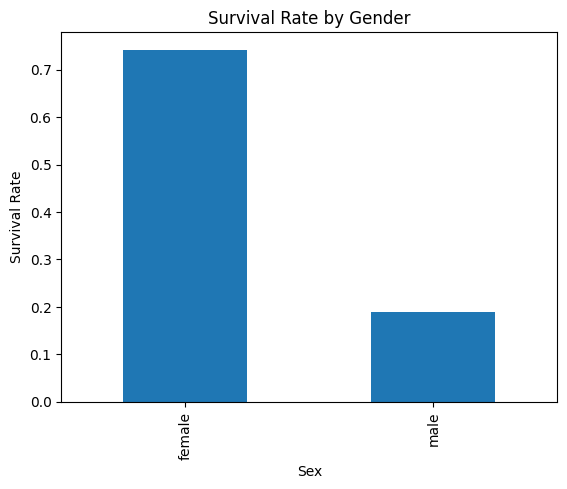

In [28]:
import matplotlib.pyplot as plt

mean_survival = df.groupby('Sex')['Survived'].mean()
print(mean_survival)

mean_survival.plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

Problem 5 — Survival by Embarkation port

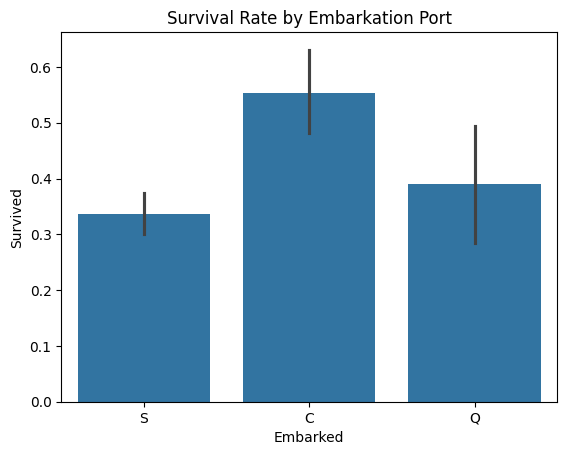

In [30]:
df = pd.read_csv("/content/drive/MyDrive/5CS0129 Concepts and Technologies of AI/Titanic-Dataset.csv")
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='Embarked', y='Survived')
plt.title("Survival Rate by Embarkation Port")
plt.show()